# Telecom Customer Data - Exploratory Data Analysis
## AI Customer Upsell Prediction System

This notebook performs comprehensive EDA:
- Descriptive statistics
- Distribution analysis
- Correlation analysis
- Customer behavior patterns
- Churn analysis
- Business insights

In [1]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')
pd.set_option('display.max_columns', None)

# Set figure size
plt.rcParams['figure.figsize'] = (12, 8)

/home/reddy007/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load processed data
print("📊 Loading Processed Telecom Data...")
df = pd.read_csv('../data/processed/telecom_processed.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Features: {df.shape[1]}")
print(f"Customers: {df.shape[0]:,}")

# Display basic info
df.info()

📊 Loading Processed Telecom Data...


Dataset Shape: (60445, 47)
Features: 47
Customers: 60,445
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60445 entries, 0 to 60444
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Phone Number             60445 non-null  object 
 1   Account Length           60445 non-null  int64  
 2   VMail Message            60445 non-null  int64  
 3   Day Mins                 60445 non-null  float64
 4   Day Calls                60445 non-null  int64  
 5   Day Charge               60445 non-null  float64
 6   Eve Mins                 60445 non-null  float64
 7   Eve Calls                60445 non-null  int64  
 8   Eve Charge               60445 non-null  float64
 9   Night Mins               60445 non-null  float64
 10  Night Calls              60445 non-null  int64  
 11  Night Charge             60445 non-null  float64
 12  Intl Mins                60445 non-null  float64
 13  Intl Calls        

In [4]:
# Descriptive Statistics
print("📈 Descriptive Statistics")
print("="*50)

# Key metrics
key_metrics = [
    'Account Length', 'Total_Minutes', 'Total_Calls', 'Total_Charges',
    'CustServ Calls', 'VMail Message', 'Churn_Binary'
]

desc_stats = df[key_metrics].describe()
print(desc_stats.round(2))

# Churn rate
churn_rate = df['Churn_Binary'].mean()
print(f"\n🎯 Overall Churn Rate: {churn_rate:.3f} ({churn_rate*100:.1f}%)")

📈 Descriptive Statistics
       Account Length  Total_Minutes  Total_Calls  Total_Charges  \
count        60445.00       60445.00     60445.00       60445.00   
mean           329.39        1947.81       820.26         118.16   
std           1436.76        4673.13      1752.06         149.05   
min              1.00         270.80        74.00          19.12   
25%             68.00         709.20       358.00          62.96   
50%            200.00         809.80       519.00          78.62   
75%            243.00        1386.00       675.00         128.22   
max          21111.00      132466.53     42430.00        1535.75   

       CustServ Calls  VMail Message  Churn_Binary  
count        60445.00       60445.00      60445.00  
mean             2.56          18.10          0.11  
std              2.38          76.86          0.31  
min              0.00           0.00          0.00  
25%              2.00           0.00          0.00  
50%              2.00           0.00        

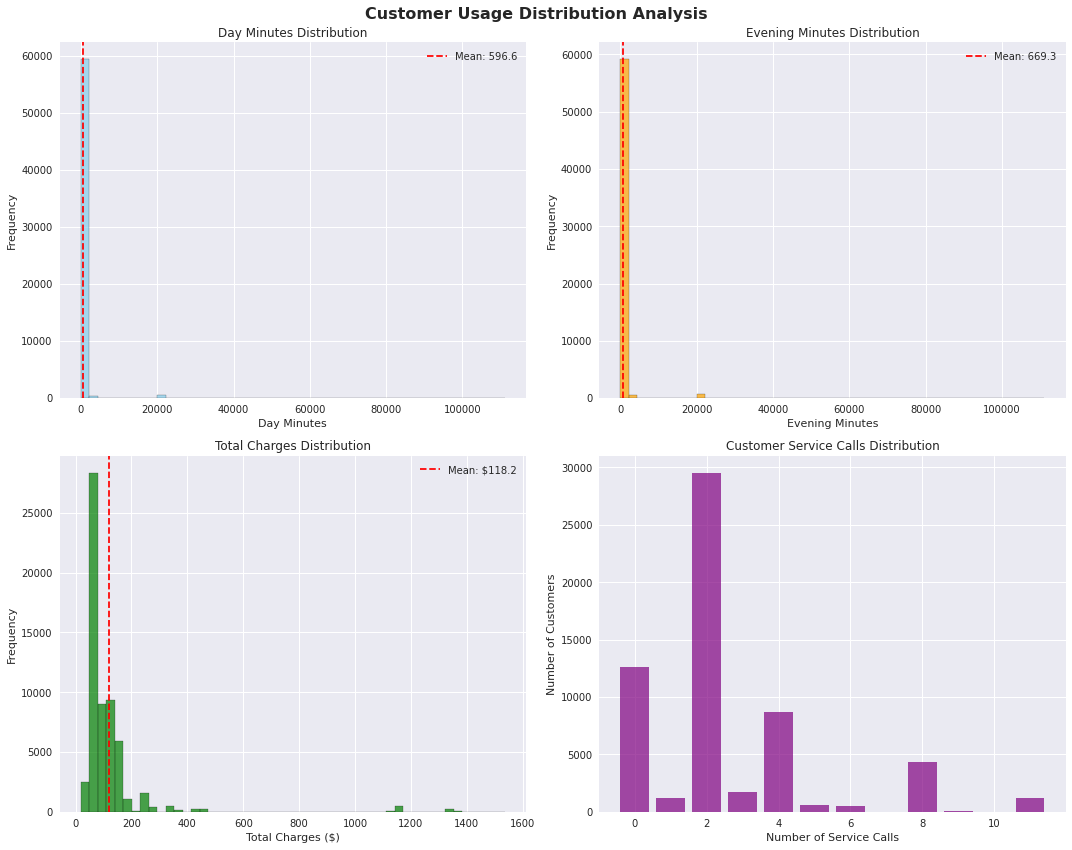

In [5]:
# Distribution Analysis - Usage Patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Customer Usage Distribution Analysis', fontsize=16, fontweight='bold')

# Day Minutes Distribution
axes[0,0].hist(df['Day Mins'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Day Minutes Distribution')
axes[0,0].set_xlabel('Day Minutes')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df['Day Mins'].mean(), color='red', linestyle='--', label=f'Mean: {df["Day Mins"].mean():.1f}')
axes[0,0].legend()

# Evening Minutes Distribution
axes[0,1].hist(df['Eve Mins'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].set_title('Evening Minutes Distribution')
axes[0,1].set_xlabel('Evening Minutes')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(df['Eve Mins'].mean(), color='red', linestyle='--', label=f'Mean: {df["Eve Mins"].mean():.1f}')
axes[0,1].legend()

# Total Charges Distribution
axes[1,0].hist(df['Total_Charges'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1,0].set_title('Total Charges Distribution')
axes[1,0].set_xlabel('Total Charges ($)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].axvline(df['Total_Charges'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Total_Charges"].mean():.1f}')
axes[1,0].legend()

# Customer Service Calls Distribution
service_calls_counts = df['CustServ Calls'].value_counts().sort_index()
axes[1,1].bar(service_calls_counts.index, service_calls_counts.values, alpha=0.7, color='purple')
axes[1,1].set_title('Customer Service Calls Distribution')
axes[1,1].set_xlabel('Number of Service Calls')
axes[1,1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

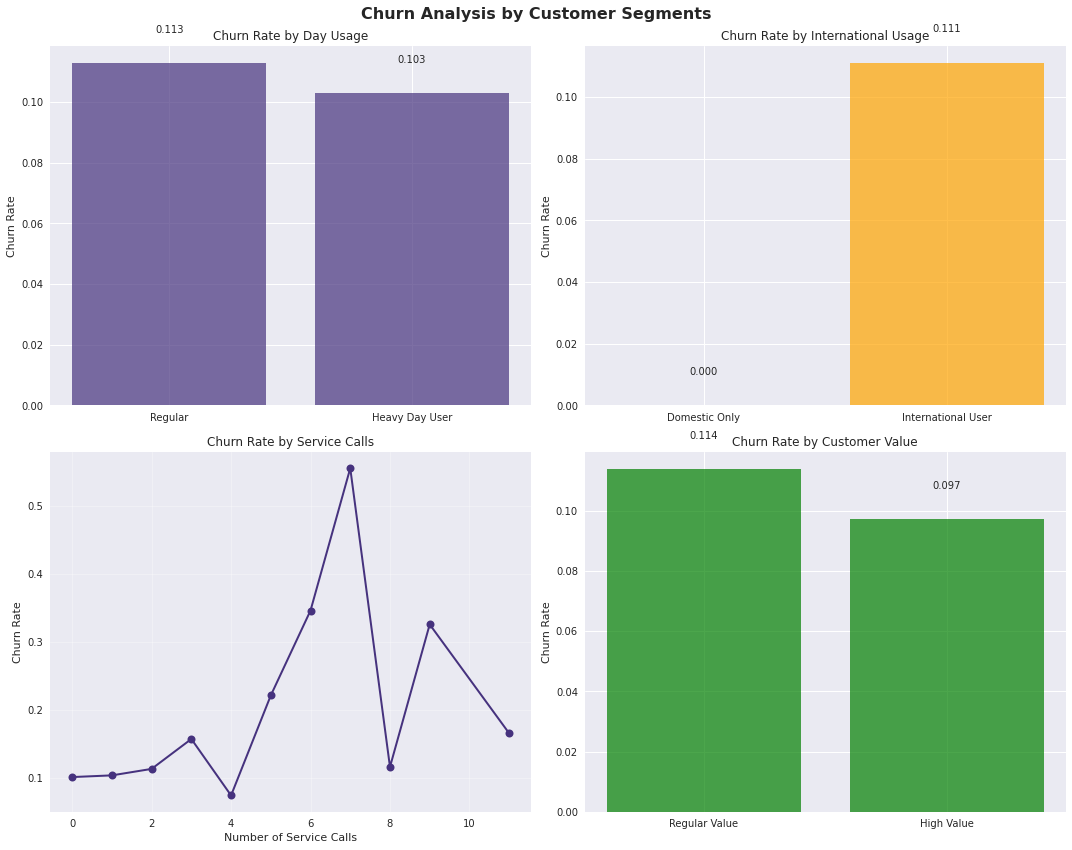

In [6]:
# Churn Analysis by Customer Segments
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Churn Analysis by Customer Segments', fontsize=16, fontweight='bold')

# Churn by Heavy Day Users
churn_by_day_users = df.groupby('Is_Heavy_Day_User')['Churn_Binary'].agg(['count', 'mean']).reset_index()
churn_by_day_users['User_Type'] = churn_by_day_users['Is_Heavy_Day_User'].map({0: 'Regular', 1: 'Heavy Day User'})
axes[0,0].bar(churn_by_day_users['User_Type'], churn_by_day_users['mean'], alpha=0.7)
axes[0,0].set_title('Churn Rate by Day Usage')
axes[0,0].set_ylabel('Churn Rate')
for i, v in enumerate(churn_by_day_users['mean']):
    axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Churn by International Users
churn_by_intl = df.groupby('Is_Intl_User')['Churn_Binary'].agg(['count', 'mean']).reset_index()
churn_by_intl['User_Type'] = churn_by_intl['Is_Intl_User'].map({0: 'Domestic Only', 1: 'International User'})
axes[0,1].bar(churn_by_intl['User_Type'], churn_by_intl['mean'], alpha=0.7, color='orange')
axes[0,1].set_title('Churn Rate by International Usage')
axes[0,1].set_ylabel('Churn Rate')
for i, v in enumerate(churn_by_intl['mean']):
    axes[0,1].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Churn by Service Calls
churn_by_service = df.groupby('CustServ Calls')['Churn_Binary'].mean().reset_index()
axes[1,0].plot(churn_by_service['CustServ Calls'], churn_by_service['Churn_Binary'], marker='o', linewidth=2, markersize=8)
axes[1,0].set_title('Churn Rate by Service Calls')
axes[1,0].set_xlabel('Number of Service Calls')
axes[1,0].set_ylabel('Churn Rate')
axes[1,0].grid(True, alpha=0.3)

# Churn by High Value Customers
churn_by_value = df.groupby('Is_High_Value_Customer')['Churn_Binary'].agg(['count', 'mean']).reset_index()
churn_by_value['Customer_Type'] = churn_by_value['Is_High_Value_Customer'].map({0: 'Regular Value', 1: 'High Value'})
axes[1,1].bar(churn_by_value['Customer_Type'], churn_by_value['mean'], alpha=0.7, color='green')
axes[1,1].set_title('Churn Rate by Customer Value')
axes[1,1].set_ylabel('Churn Rate')
for i, v in enumerate(churn_by_value['mean']):
    axes[1,1].text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

🔗 Correlation Analysis


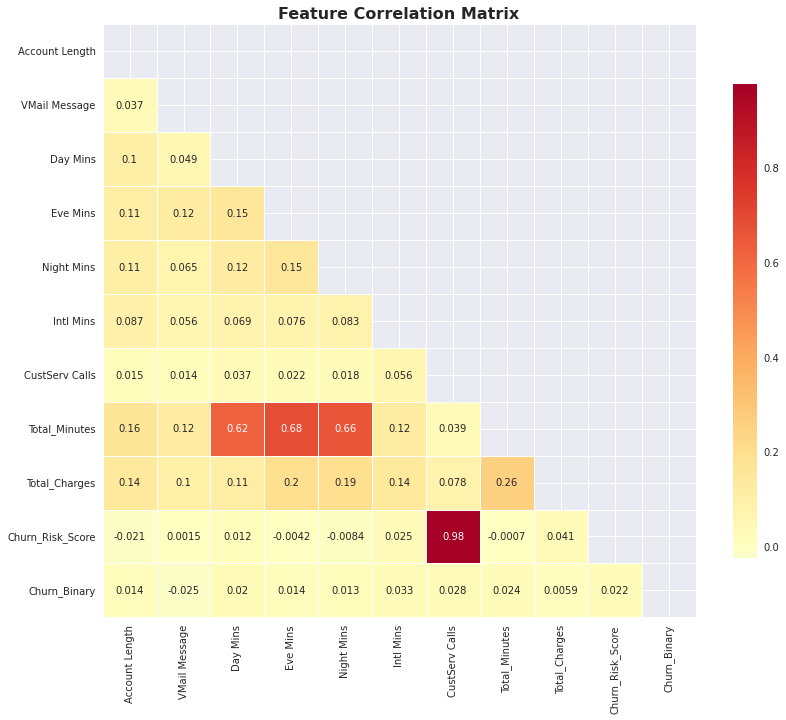


🎯 Top Features Correlated with Churn:
Intl Mins: 0.033
CustServ Calls: 0.028
VMail Message: 0.025
Total_Minutes: 0.024
Churn_Risk_Score: 0.022
Day Mins: 0.020
Eve Mins: 0.014
Account Length: 0.014
Night Mins: 0.013


In [7]:
# Correlation Analysis
print("🔗 Correlation Analysis")
print("="*50)

# Select key features for correlation
correlation_features = [
    'Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins',
    'CustServ Calls', 'Total_Minutes', 'Total_Charges', 'Churn_Risk_Score', 'Churn_Binary'
]

# Calculate correlation matrix
corr_matrix = df[correlation_features].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with Churn
churn_correlations = corr_matrix['Churn_Binary'].abs().sort_values(ascending=False)
print("\n🎯 Top Features Correlated with Churn:")
for feature, corr in churn_correlations.head(10).items():
    if feature != 'Churn_Binary':
        print(f"{feature}: {corr:.3f}")

👥 Customer Behavior Patterns


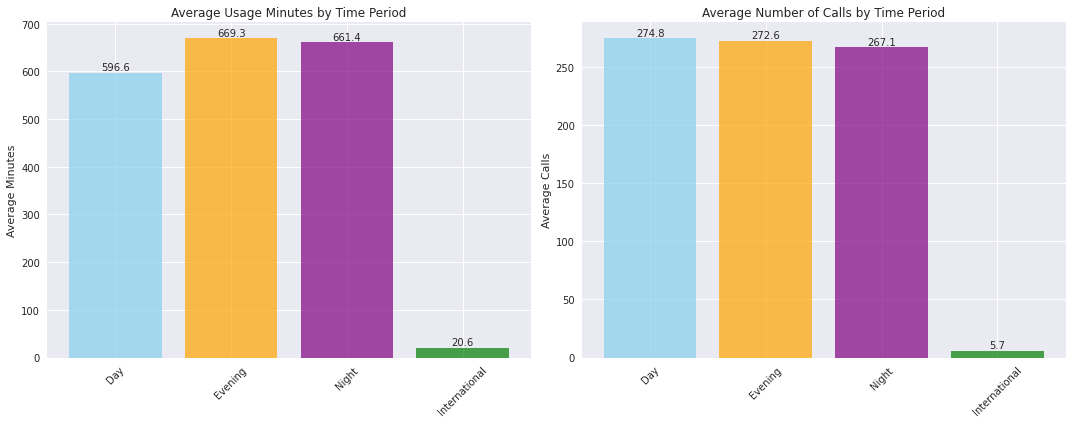


📊 Usage Pattern Summary:
     Time_Period  Average_Minutes  Average_Calls
0            Day           596.56         274.75
1        Evening           669.29         272.65
2          Night           661.40         267.13
3  International            20.57           5.73


In [8]:
# Customer Behavior Patterns
print("👥 Customer Behavior Patterns")
print("="*50)

# Usage patterns by time of day
usage_patterns = pd.DataFrame({
    'Time_Period': ['Day', 'Evening', 'Night', 'International'],
    'Average_Minutes': [
        df['Day Mins'].mean(),
        df['Eve Mins'].mean(), 
        df['Night Mins'].mean(),
        df['Intl Mins'].mean()
    ],
    'Average_Calls': [
        df['Day Calls'].mean(),
        df['Eve Calls'].mean(),
        df['Night Calls'].mean(),
        df['Intl Calls'].mean()
    ]
})

# Plot usage patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Average minutes by time period
ax1.bar(usage_patterns['Time_Period'], usage_patterns['Average_Minutes'], 
        alpha=0.7, color=['skyblue', 'orange', 'purple', 'green'])
ax1.set_title('Average Usage Minutes by Time Period')
ax1.set_ylabel('Average Minutes')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(usage_patterns['Average_Minutes']):
    ax1.text(i, v + 5, f'{v:.1f}', ha='center')

# Average calls by time period
ax2.bar(usage_patterns['Time_Period'], usage_patterns['Average_Calls'], 
        alpha=0.7, color=['skyblue', 'orange', 'purple', 'green'])
ax2.set_title('Average Number of Calls by Time Period')
ax2.set_ylabel('Average Calls')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(usage_patterns['Average_Calls']):
    ax2.text(i, v + 2, f'{v:.1f}', ha='center')

plt.tight_layout()
plt.show()

print("\n📊 Usage Pattern Summary:")
print(usage_patterns.round(2))

🎯 Customer Segmentation Analysis


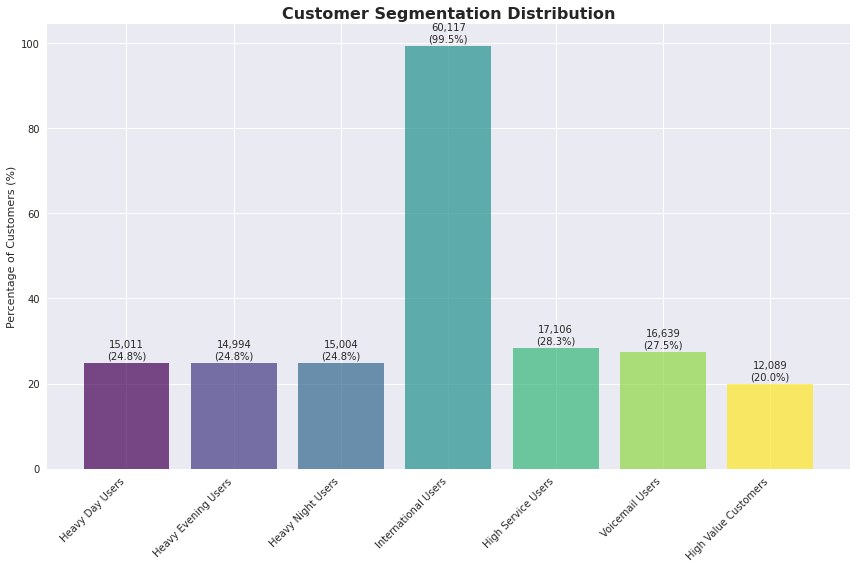


📈 Customer Segments Summary:
                Segment  Count  Percentage
0       Heavy Day Users  15011   24.834147
1   Heavy Evening Users  14994   24.806022
2     Heavy Night Users  15004   24.822566
3   International Users  60117   99.457358
4    High Service Users  17106   28.300108
5       Voicemail Users  16639   27.527504
6  High Value Customers  12089   20.000000


In [9]:
# Customer Segmentation Analysis
print("🎯 Customer Segmentation Analysis")
print("="*50)

# Create customer segments based on engineered features
segments = pd.DataFrame({
    'Segment': [
        'Heavy Day Users', 'Heavy Evening Users', 'Heavy Night Users',
        'International Users', 'High Service Users', 'Voicemail Users',
        'High Value Customers'
    ],
    'Count': [
        df['Is_Heavy_Day_User'].sum(),
        df['Is_Heavy_Eve_User'].sum(),
        df['Is_Heavy_Night_User'].sum(),
        df['Is_Intl_User'].sum(),
        df['Is_High_Service_User'].sum(),
        df['Has_Voicemail'].sum(),
        df['Is_High_Value_Customer'].sum()
    ]
})

segments['Percentage'] = (segments['Count'] / len(df)) * 100

# Plot customer segments
plt.figure(figsize=(12, 8))
bars = plt.bar(segments['Segment'], segments['Percentage'], alpha=0.7, 
               color=plt.cm.viridis(np.linspace(0, 1, len(segments))))
plt.title('Customer Segmentation Distribution', fontsize=16, fontweight='bold')
plt.ylabel('Percentage of Customers (%)')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, count, pct in zip(bars, segments['Count'], segments['Percentage']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n📈 Customer Segments Summary:")
print(segments)

💰 Revenue Analysis
📊 Revenue Statistics:
Total Revenue: $7,141,990.32
Average Revenue per Customer: $118.16
Median Revenue per Customer: $78.62
Revenue Standard Deviation: $149.05
Top 10% Customers Revenue: $2,406,438.97
Bottom 10% Customers Revenue: $290,867.17


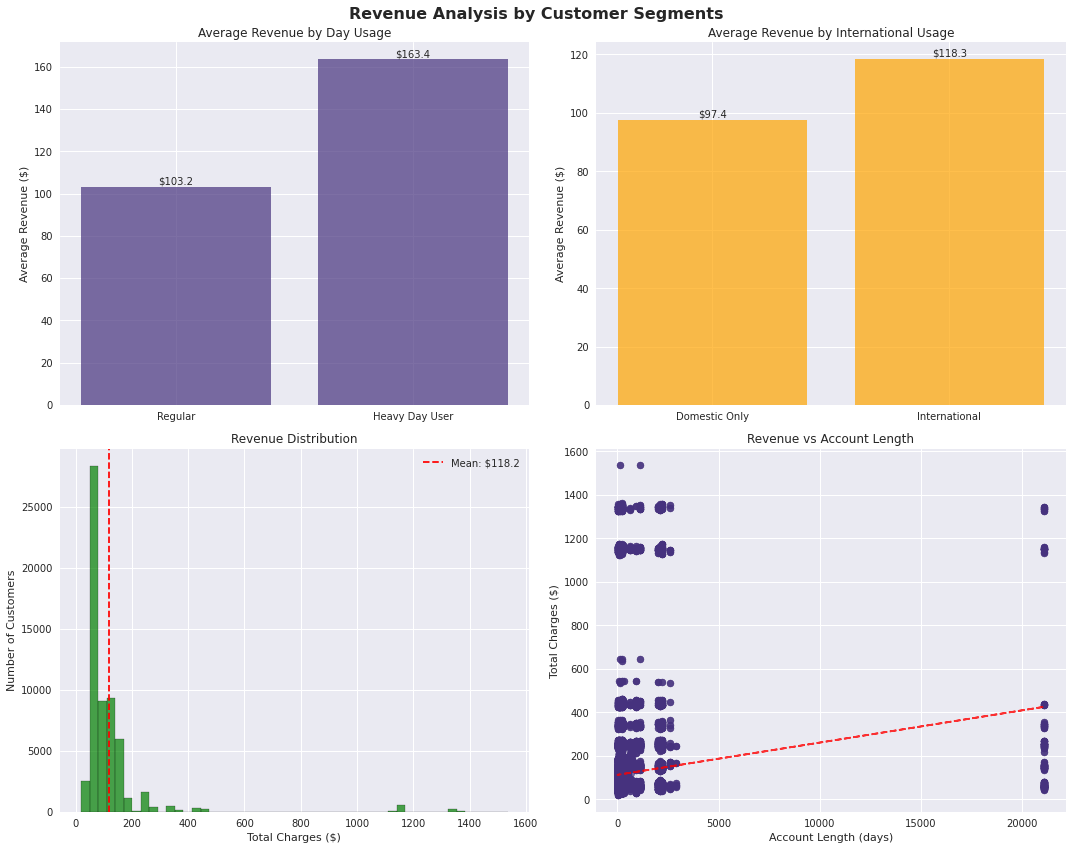

In [10]:
# Revenue Analysis
print("💰 Revenue Analysis")
print("="*50)

# Revenue distribution analysis
revenue_stats = {
    'Total Revenue': df['Total_Charges'].sum(),
    'Average Revenue per Customer': df['Total_Charges'].mean(),
    'Median Revenue per Customer': df['Total_Charges'].median(),
    'Revenue Standard Deviation': df['Total_Charges'].std(),
    'Top 10% Customers Revenue': df[df['Total_Charges'] > df['Total_Charges'].quantile(0.9)]['Total_Charges'].sum(),
    'Bottom 10% Customers Revenue': df[df['Total_Charges'] < df['Total_Charges'].quantile(0.1)]['Total_Charges'].sum()
}

print("📊 Revenue Statistics:")
for metric, value in revenue_stats.items():
    print(f"{metric}: ${value:,.2f}")

# Revenue by customer segments
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Revenue Analysis by Customer Segments', fontsize=16, fontweight='bold')

# Revenue by Heavy Day Users
day_revenue = df.groupby('Is_Heavy_Day_User')['Total_Charges'].agg(['mean', 'sum']).reset_index()
day_revenue['User_Type'] = day_revenue['Is_Heavy_Day_User'].map({0: 'Regular', 1: 'Heavy Day User'})
axes[0,0].bar(day_revenue['User_Type'], day_revenue['mean'], alpha=0.7)
axes[0,0].set_title('Average Revenue by Day Usage')
axes[0,0].set_ylabel('Average Revenue ($)')
for i, v in enumerate(day_revenue['mean']):
    axes[0,0].text(i, v + 1, f'${v:.1f}', ha='center')

# Revenue by International Users
intl_revenue = df.groupby('Is_Intl_User')['Total_Charges'].agg(['mean', 'sum']).reset_index()
intl_revenue['User_Type'] = intl_revenue['Is_Intl_User'].map({0: 'Domestic Only', 1: 'International'})
axes[0,1].bar(intl_revenue['User_Type'], intl_revenue['mean'], alpha=0.7, color='orange')
axes[0,1].set_title('Average Revenue by International Usage')
axes[0,1].set_ylabel('Average Revenue ($)')
for i, v in enumerate(intl_revenue['mean']):
    axes[0,1].text(i, v + 1, f'${v:.1f}', ha='center')

# Revenue distribution
axes[1,0].hist(df['Total_Charges'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1,0].set_title('Revenue Distribution')
axes[1,0].set_xlabel('Total Charges ($)')
axes[1,0].set_ylabel('Number of Customers')
axes[1,0].axvline(df['Total_Charges'].mean(), color='red', linestyle='--', 
                  label=f'Mean: ${df["Total_Charges"].mean():.1f}')
axes[1,0].legend()

# Revenue vs Account Length
axes[1,1].scatter(df['Account Length'], df['Total_Charges'], alpha=0.7)
axes[1,1].set_title('Revenue vs Account Length')
axes[1,1].set_xlabel('Account Length (days)')
axes[1,1].set_ylabel('Total Charges ($)')

# Add trend line
z = np.polyfit(df['Account Length'], df['Total_Charges'], 1)
p = np.poly1d(z)
axes[1,1].plot(df['Account Length'], p(df['Account Length']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

In [11]:
# Business Insights and Key Findings
print("💡 Business Insights and Key Findings")
print("="*60)

# Calculate key business metrics
total_customers = len(df)
churned_customers = df['Churn_Binary'].sum()
churn_rate = df['Churn_Binary'].mean()
avg_revenue_per_customer = df['Total_Charges'].mean()
total_revenue = df['Total_Charges'].sum()
high_value_customers = df['Is_High_Value_Customer'].sum()
high_service_users = df['Is_High_Service_User'].sum()

# Revenue impact of churn
churned_revenue = df[df['Churn_Binary'] == 1]['Total_Charges'].sum()
retained_revenue = df[df['Churn_Binary'] == 0]['Total_Charges'].sum()

# Customer service impact
high_service_churn_rate = df[df['Is_High_Service_User'] == 1]['Churn_Binary'].mean()
low_service_churn_rate = df[df['Is_High_Service_User'] == 0]['Churn_Binary'].mean()

insights = f"""
🎯 KEY BUSINESS INSIGHTS:

📊 CUSTOMER BASE OVERVIEW:
• Total Customers: {total_customers:,}
• Churned Customers: {churned_customers:,} ({churn_rate*100:.1f}%)
• Retained Customers: {total_customers - churned_customers:,} ({(1-churn_rate)*100:.1f}%)
• High-Value Customers: {high_value_customers:,} ({high_value_customers/total_customers*100:.1f}%)

💰 REVENUE INSIGHTS:
• Total Revenue: ${total_revenue:,.2f}
• Average Revenue per Customer: ${avg_revenue_per_customer:.2f}
• Revenue from Churned Customers: ${churned_revenue:,.2f}
• Revenue from Retained Customers: ${retained_revenue:,.2f}
• Revenue at Risk: {churned_revenue/total_revenue*100:.1f}% of total revenue

📞 CUSTOMER SERVICE INSIGHTS:
• High Service Users: {high_service_users:,} ({high_service_users/total_customers*100:.1f}%)
• Churn Rate (High Service Users): {high_service_churn_rate*100:.1f}%
• Churn Rate (Low Service Users): {low_service_churn_rate*100:.1f}%
• Service Impact: {((high_service_churn_rate - low_service_churn_rate)*100):.1f}% higher churn for high service users

🎯 UPSELL OPPORTUNITIES:
• International Users: {df['Is_Intl_User'].sum():,} customers ({df['Is_Intl_User'].mean()*100:.1f}%)
• Heavy Day Users: {df['Is_Heavy_Day_User'].sum():,} customers ({df['Is_Heavy_Day_User'].mean()*100:.1f}%)
• Heavy Evening Users: {df['Is_Heavy_Eve_User'].sum():,} customers ({df['Is_Heavy_Eve_User'].mean()*100:.1f}%)
• Voicemail Users: {df['Has_Voicemail'].sum():,} customers ({df['Has_Voicemail'].mean()*100:.1f}%)

📈 ACTIONABLE RECOMMENDATIONS:
1. Focus retention efforts on high-service users (higher churn risk)
2. Target international users for premium international packages
3. Offer unlimited plans to heavy day/evening users
4. Implement proactive customer service for high-value customers
5. Develop voicemail enhancement packages for existing voicemail users
"""

print(insights)

💡 Business Insights and Key Findings

🎯 KEY BUSINESS INSIGHTS:

📊 CUSTOMER BASE OVERVIEW:
• Total Customers: 60,445
• Churned Customers: 6,677 (11.0%)
• Retained Customers: 53,768 (89.0%)
• High-Value Customers: 12,089 (20.0%)

💰 REVENUE INSIGHTS:
• Total Revenue: $7,141,990.32
• Average Revenue per Customer: $118.16
• Revenue from Churned Customers: $805,461.23
• Revenue from Retained Customers: $6,336,529.09
• Revenue at Risk: 11.3% of total revenue

📞 CUSTOMER SERVICE INSIGHTS:
• High Service Users: 17,106 (28.3%)
• Churn Rate (High Service Users): 11.4%
• Churn Rate (Low Service Users): 10.9%
• Service Impact: 0.5% higher churn for high service users

🎯 UPSELL OPPORTUNITIES:
• International Users: 60,117 customers (99.5%)
• Heavy Day Users: 15,011 customers (24.8%)
• Heavy Evening Users: 14,994 customers (24.8%)
• Voicemail Users: 16,639 customers (27.5%)

📈 ACTIONABLE RECOMMENDATIONS:
1. Focus retention efforts on high-service users (higher churn risk)
2. Target international user

🎯 Feature Importance Analysis for Upsell Prediction


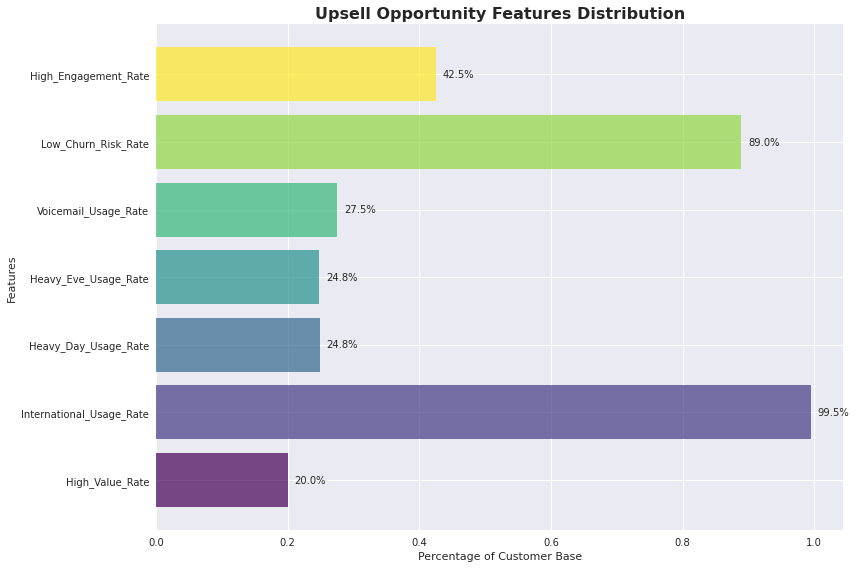


📊 Upsell Feature Summary:
High Value Rate: 20.0%
International Usage Rate: 99.5%
Heavy Day Usage Rate: 24.8%
Heavy Eve Usage Rate: 24.8%
Voicemail Usage Rate: 27.5%
Low Churn Risk Rate: 89.0%
High Engagement Rate: 42.5%


In [12]:
# Feature Importance for Upsell Prediction
print("🎯 Feature Importance Analysis for Upsell Prediction")
print("="*60)

# Calculate feature statistics that indicate upsell potential
upsell_features = {
    'High_Value_Rate': df['Is_High_Value_Customer'].mean(),
    'International_Usage_Rate': df['Is_Intl_User'].mean(),
    'Heavy_Day_Usage_Rate': df['Is_Heavy_Day_User'].mean(),
    'Heavy_Eve_Usage_Rate': df['Is_Heavy_Eve_User'].mean(),
    'Voicemail_Usage_Rate': df['Has_Voicemail'].mean(),
    'Low_Churn_Risk_Rate': (df['Churn_Binary'] == 0).mean(),
    'High_Engagement_Rate': (df['Engagement_Score'] > df['Engagement_Score'].median()).mean()
}

# Create feature importance plot
features = list(upsell_features.keys())
importance_scores = list(upsell_features.values())

plt.figure(figsize=(12, 8))
bars = plt.barh(features, importance_scores, alpha=0.7, 
                color=plt.cm.viridis(np.linspace(0, 1, len(features))))
plt.title('Upsell Opportunity Features Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Customer Base')
plt.ylabel('Features')

# Add value labels
for bar, score in zip(bars, importance_scores):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{score*100:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

print("\n📊 Upsell Feature Summary:")
for feature, rate in upsell_features.items():
    print(f"{feature.replace('_', ' ')}: {rate*100:.1f}%")

In [13]:
# Save EDA Results
print("💾 Saving EDA Results...")

# Create summary statistics
eda_summary = {
    'dataset_shape': df.shape,
    'total_customers': total_customers,
    'churn_rate': churn_rate,
    'total_revenue': total_revenue,
    'avg_revenue_per_customer': avg_revenue_per_customer,
    'high_value_customers': high_value_customers,
    'customer_segments': segments.to_dict('records'),
    'upsell_features': upsell_features
}

# Save to JSON for dashboard use
import json
import os
os.makedirs('../outputs/reports', exist_ok=True)

with open('../outputs/reports/eda_summary.json', 'w') as f:
    json.dump(eda_summary, f, indent=2, default=str)

print("✅ EDA summary saved to ../outputs/reports/eda_summary.json")
print("\n🎉 Exploratory Data Analysis completed successfully!")
print("\n📋 Next Steps:")
print("1. Use insights for feature selection in ML models")
print("2. Develop targeted upsell strategies based on customer segments")
print("3. Implement churn prevention for high-risk customers")
print("4. Create personalized offers for high-value customers")

💾 Saving EDA Results...
✅ EDA summary saved to ../outputs/reports/eda_summary.json

🎉 Exploratory Data Analysis completed successfully!

📋 Next Steps:
1. Use insights for feature selection in ML models
2. Develop targeted upsell strategies based on customer segments
3. Implement churn prevention for high-risk customers
4. Create personalized offers for high-value customers
